<a href="https://colab.research.google.com/github/RoshanJamthe/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type (whether movie or tv show) is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

#<b><u>Dataset Loading and viewing

In [ ]:
# EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset loading
netflix_data = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone project/Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
# View the data
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Get feature info
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
netflix_data.duplicated().sum()  # Check for duplicates

0

Text(0.5, 1.0, 'Content Description boxplot')

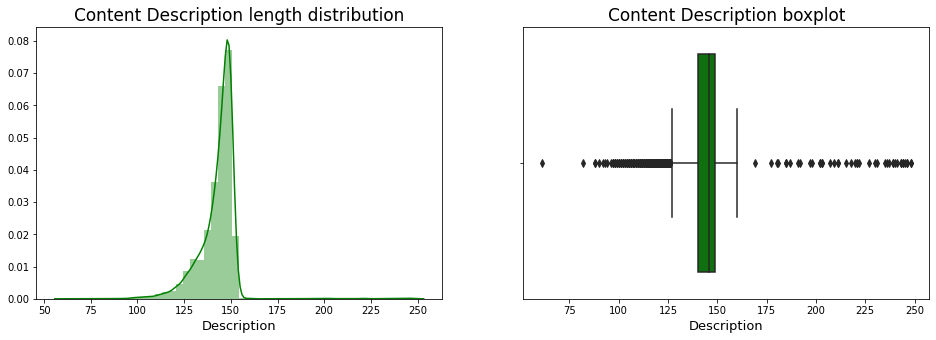

In [ ]:
# Get the length of the description feature
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(netflix_data['description'].apply(lambda x: len(x)), color='green')
plt.ylabel('',fontsize=13)
plt.xlabel('Description',fontsize=13)
plt.title('Content Description length distribution',fontsize=17)

plt.subplot(1,2,2)
sns.boxplot(netflix_data['description'].apply(lambda x: len(x)), color='green')
plt.ylabel('',fontsize=13)
plt.xlabel('Description',fontsize=13)
plt.title('Content Description boxplot',fontsize=17)

#### Inference : Most content has description length of ~140 words.

# <b><u> Exploratory Data Analysis

### Out of Movies and Tv shows, Which are more in number?

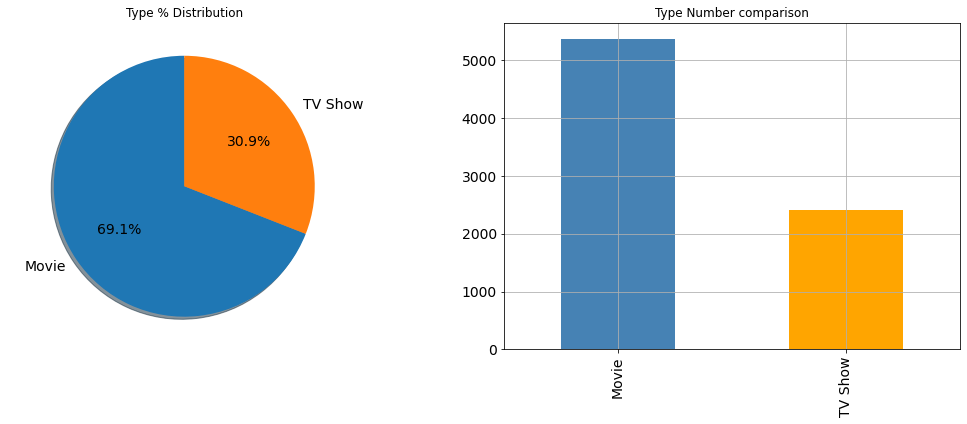

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
netflix_data['type'].value_counts().plot(kind='pie',fontsize=14, autopct='%1.1f%%',shadow=True, startangle=90,label= " ",title='Type % Distribution') # Get the pie plot

plt.subplot(1,2,2)
netflix_data['type'].value_counts().plot(kind='bar',title='Type Number comparison',fontsize=14,grid=True,color=['steelblue','orange']) # Get the bar plot
plt.show()

#### <u>Inference:</u> Movies on Netflix are more than twice in number than TV shows.

### Trend of number of movies/tv shows after 2010

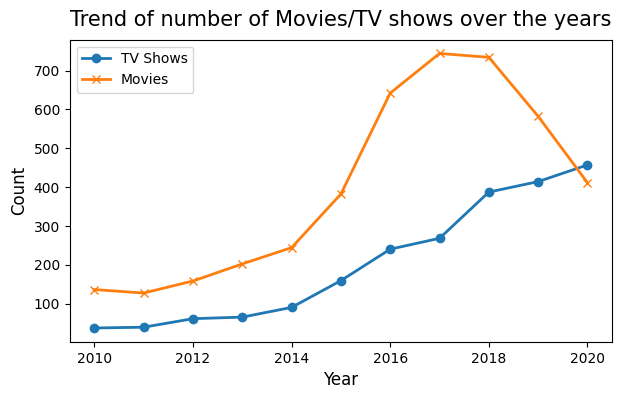

In [ ]:
# Ignoring the year 2021 for the plot
fig, ax = plt.subplots(figsize=(7, 4), dpi=100) # Using suplots to get both lineplots in same figure
ax.plot(netflix_data[(netflix_data['type']=='TV Show') & (netflix_data['release_year']>=2010)][['release_year','type']].groupby('release_year').count()[:-1], marker='o',linewidth=2,label='TV Shows') # Trend of tv shows
ax.plot(netflix_data[(netflix_data['type']=='Movie')& (netflix_data['release_year']>=2010)][['release_year','type']].groupby('release_year').count()[:-1], marker='x',linewidth=2,label='Movies') # Trend of movies
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
ax.set_title('Trend of number of Movies/TV shows over the years',fontsize=15,pad=10)
ax.legend()
plt.show()

#### <u>Inference:</u> It is clear from the plot that since past couple of years the focus from the Movies has been shifted towards TV shows.

### Top 10 Most active Directors

In [ ]:
director_data = [] # Get all the occurences of directors in cast feature in this list
for string in netflix_data[~netflix_data['director'].isna()]['director'].tolist():
  temp = string.split(',')
  for director in temp:
    director_data.append(director.strip())

In [ ]:
director_df = pd.Series(director_data) # Create a series using actor_data list

In [ ]:
director_df.value_counts() # Get the value_counts of actors

Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
                       ..
Sajid Khan              1
Lucy van Beek           1
Remi Weekes             1
Jennifer Lynch          1
Mozez Singh             1
Length: 4478, dtype: int64

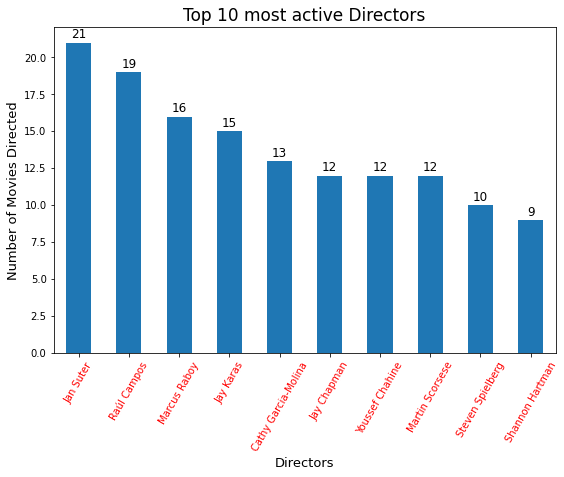

In [ ]:
plt.figure(figsize=(9,6))
plots = director_df.value_counts()[:10].plot(kind='bar',animated=True)
plt.xlabel('Directors',fontsize=13)
plt.xticks(rotation=60,color='red')

plt.ylabel('Number of Movies Directed',fontsize=13)
plt.title('Top 10 most active Directors',fontsize=17)

# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

#### <u>Inference:</u>Jan Suter is the most featured director. 

### Top 10 countries based on content count

In [ ]:
country_data = [] # Get all the occurences of countries in country feature in this list
for string in netflix_data[~netflix_data['country'].isna()]['country'].tolist():
  temp = string.split(',')
  for country in temp:
    country_data.append(country.lstrip())

In [ ]:
country_df = pd.Series(country_data) # Create a series using actor_data list

In [ ]:
country_df.value_counts() # Get the value_counts of actors

United States     3297
India              990
United Kingdom     723
Canada             412
France             349
                  ... 
Samoa                1
Azerbaijan           1
Bermuda              1
Ecuador              1
Montenegro           1
Length: 118, dtype: int64

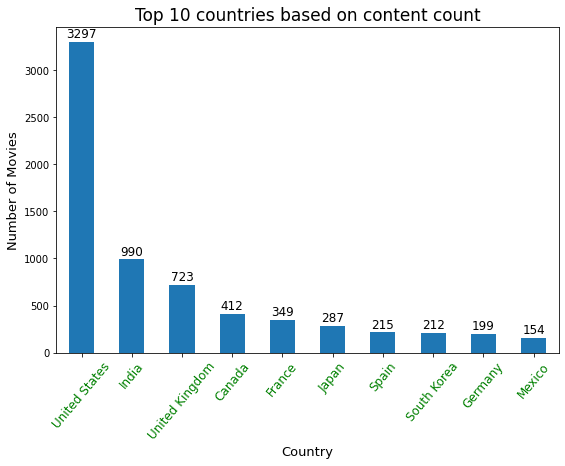

In [ ]:
plt.figure(figsize=(9,6))
plots = country_df.value_counts()[:10].plot(kind='bar',animated=True)
plt.xlabel('Country',fontsize=13)
plt.xticks(rotation=50,color='Green',size=12)

plt.ylabel('Number of Movies',fontsize=13)
plt.title('Top 10 countries based on content count',fontsize=17)

# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

#### <u>Inference:</u> United States contributes most content to Netflix, second is India followed by United Kingdom. The 10 countries shown in the plot are the future market of Netflix.

### Get movie duration distribution

In [ ]:
# Create a new dataframe for the analysis
duration = netflix_data[['type','duration']].copy()
duration.head()

,type,duration
0,TV Show,4 Seasons
1,Movie,93 min
2,Movie,78 min
3,Movie,80 min
4,Movie,123 min


In [ ]:
duration['length']=duration['duration'].apply(lambda x: x.split(" ")[0]) # Get length of seasons and movie duration

In [ ]:
duration.head() # Check the change

,type,duration,length
0,TV Show,4 Seasons,4
1,Movie,93 min,93
2,Movie,78 min,78
3,Movie,80 min,80
4,Movie,123 min,123


Text(0.5, 1.0, 'TV show seasons Distribution')

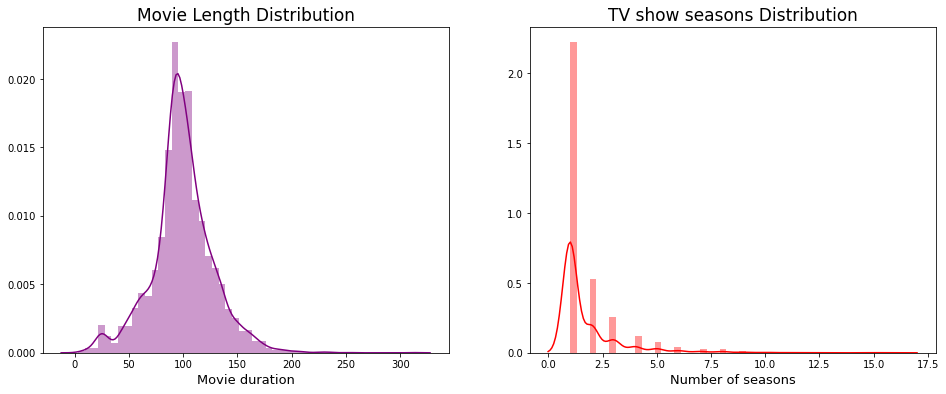

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(duration[duration['type']=='Movie']['length'],hist=True,color='purple')
plt.ylabel('',fontsize=13)
plt.xlabel('Movie duration',fontsize=13)
plt.title('Movie Length Distribution',fontsize=17)

plt.subplot(1,2,2)
sns.distplot(duration[duration['type']=='TV Show']['length'],hist=True,color='red')
plt.ylabel('',fontsize=13)
plt.xlabel('Number of seasons',fontsize=13)
plt.title('TV show seasons Distribution',fontsize=17)

#### <u>Inference</u>: Most movies are of length ~90 mins, there are some rare movies of length ~300 mins i.e 5 hours. Most TV Shows have only one season, there are TV shows having more than 10 seasons. 


### Get rating distribution

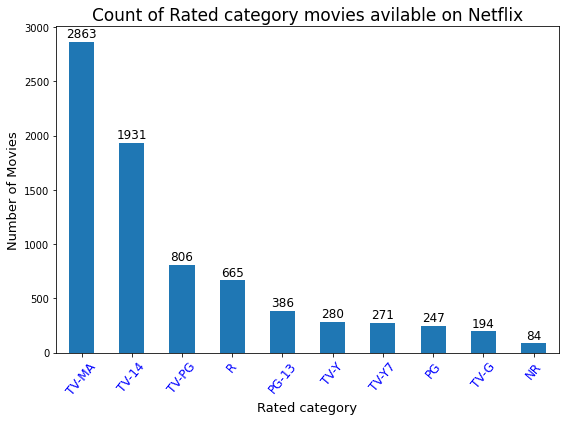

In [ ]:
plt.figure(figsize=(9,6))
plots = netflix_data['rating'].value_counts()[:10].plot(kind='bar',animated=True)
plt.xlabel('Rated category',fontsize=13)
plt.xticks(rotation=50,color='blue',size=12)

plt.ylabel('Number of Movies',fontsize=13)
plt.title('Count of Rated category movies avilable on Netflix',fontsize=17)

# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

#### <u>Inference</u>: Most number of movies are for age 17 and above, there are very few movies which are not rated. 

### Most active actor

In [ ]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
actor_data = [] # Get all the occurences of actors in cast feature in this list
for string in netflix_data[~netflix_data['cast'].isna()]['cast'].tolist():
  temp = string.split(',')
  for actor in temp:
    actor_data.append(actor.strip())

In [ ]:
actor_df = pd.Series(actor_data) # Create a series using actor_data list

In [ ]:
actor_df.value_counts() # Get the value_counts of actors

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
                    ..
Archie Alemania      1
Demore Barnes        1
Marty Adams          1
Nicole Boivin        1
Rachel Khoo          1
Length: 32881, dtype: int64

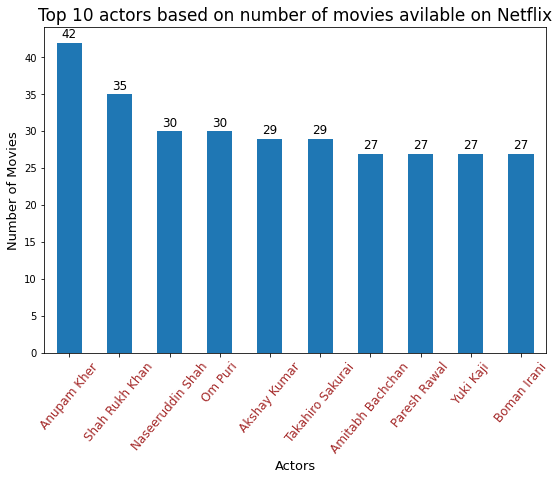

In [ ]:
plt.figure(figsize=(9,6))
plots = actor_df.value_counts()[:10].plot(kind='bar')
plt.xlabel('Actors',fontsize=13)
plt.xticks(rotation=50,color='brown',size=12)

plt.ylabel('Number of Movies',fontsize=13)
plt.title('Top 10 actors based on number of movies avilable on Netflix',fontsize=17)

# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

#### <u>Inference</u>: Most featured actor is Anupam Kher. Out of top 10 actors, 8 are Indians. It shows the impact of Indian actors on the World cinema

### Get top 10 genres

In [ ]:
genre_data = [] # Get all the occurences of genres in listed_in feature in this list
for string in netflix_data['listed_in'].tolist():
  temp = string.split(',')
  for genre in temp:
    genre_data.append(genre.strip()) # stripping the genre of the leading whitespaces

In [ ]:
genre_df = pd.Series(genre_data) # Create a series using actor_data list

In [ ]:
genre_df.value_counts()[:15]

International Movies        2437
Dramas                      2106
Comedies                    1471
International TV Shows      1199
Documentaries                786
Action & Adventure           721
TV Dramas                    704
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
TV Comedies                  525
Thrillers                    491
Crime TV Shows               427
Kids' TV                     414
Docuseries                   353
dtype: int64

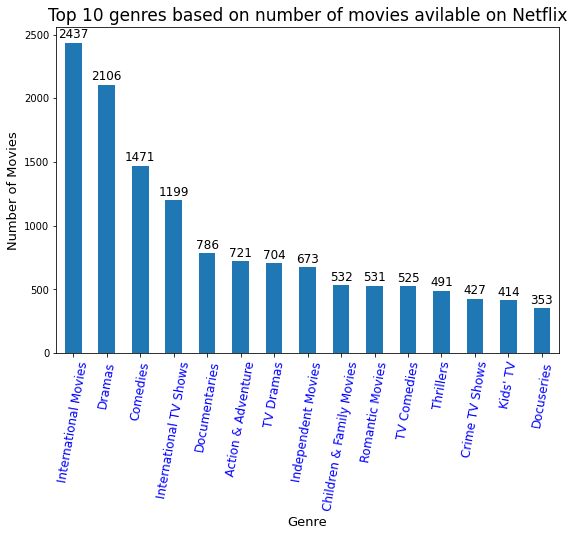

In [ ]:
plt.figure(figsize=(9,6))
plots = genre_df.value_counts()[:15].plot(kind='bar')
plt.xlabel('Genre',fontsize=13)
plt.xticks(rotation=80,color='blue',size=12)

plt.ylabel('Number of Movies',fontsize=13)
plt.title('Top 10 genres based on number of movies avilable on Netflix',fontsize=17)

# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

#### <u>Inference</u>: International movies is the top genre followed by Dramas and Comedies.

### Type - Country relationship, Understanding what type (whether movie or tv show) is available in different countries 

In [ ]:
country_data = [] # Get all the occurences of countries in country feature in this list
for string in netflix_data[~netflix_data['country'].isna()]['country'].tolist():
  temp = string.split(',')
  country_data.append(temp[0].strip())

In [ ]:
# Get a copy of netflix_data
country_df = netflix_data[~netflix_data['country'].isna()].copy()

# Create a main_country column
country_df['main_country'] = country_data

In [ ]:
country_type = country_df[['show_id','type','main_country']].groupby(['main_country','type']).count().reset_index()
country_type.head()

,main_country,type,show_id
0,Argentina,Movie,50
1,Argentina,TV Show,18
2,Australia,Movie,56
3,Australia,TV Show,52
4,Austria,Movie,7


In [ ]:
# Using pivot function to create a table of index = country, columns = type, values = show_id
country_type_pivoted = country_type.pivot('main_country', 'type', 'show_id').fillna(0).sort_values(['Movie','TV Show'],ascending=False).reset_index()
country_type_pivoted

type,main_country,Movie,TV Show
0,United States,2100.0,783.0
1,India,883.0,73.0
2,United Kingdom,341.0,236.0
3,Canada,175.0,84.0
4,France,137.0,59.0
...,...,...,...
76,Cyprus,0.0,1.0
77,Jordan,0.0,1.0
78,Mauritius,0.0,1.0
79,Puerto Rico,0.0,1.0


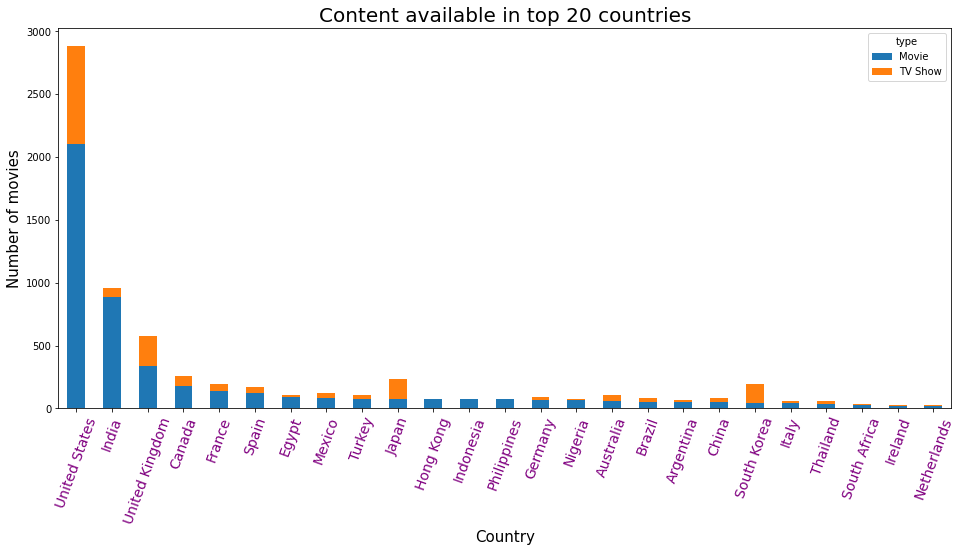

In [ ]:
country_type_pivoted[:25].set_index('main_country').plot(kind='bar', stacked=True, figsize=(16,7))
plt.xlabel("Country", fontsize=15)
plt.xticks(rotation=70,color='purple',size=14)
plt.ylabel("Number of movies", fontsize=15)
plt.title("Content available in top 20 countries", fontsize=20)
plt.show()

#### <u>Inference</u>: Countries like Japan, South Korea has more focus on TV Shows than on Movies. India has remarkably low focus towards TV Shows when compared with number of movies the country made till now. 

### Content addition trend of India and South Korea 

In [ ]:
India_df = country_df[(country_df['main_country']=='India')]
southkorea_df = country_df[(country_df['main_country']=='South Korea')]

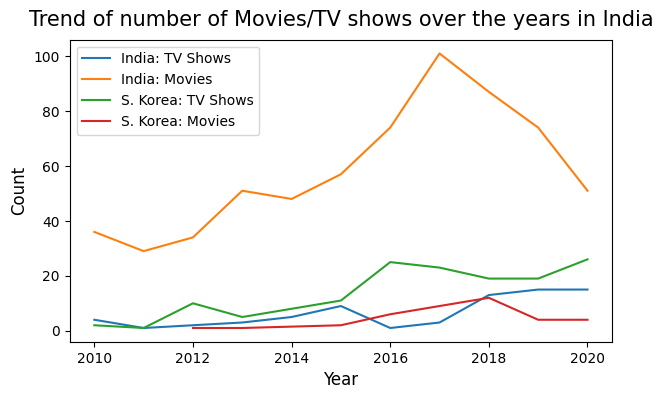

In [ ]:
# Ignoring the year 2021 for the plot
fig, ax = plt.subplots(figsize=(7, 4), dpi=100) # Using suplots to get both lineplots in same figure
ax.plot(India_df[(India_df['type']=='TV Show') & (India_df['release_year']>=2010)][['release_year','type']].groupby('release_year').count()[:-1],label='India: TV Shows') # Trend of tv shows
ax.plot(India_df[(India_df['type']=='Movie')& (India_df['release_year']>=2010)][['release_year','type']].groupby('release_year').count(), label='India: Movies') # Trend of movies

ax.plot(southkorea_df[(southkorea_df['type']=='TV Show') & (southkorea_df['release_year']>=2010)][['release_year','type']].groupby('release_year').count(),label='S. Korea: TV Shows') # Trend of tv shows
ax.plot(southkorea_df[(southkorea_df['type']=='Movie')& (southkorea_df['release_year']>=2010)][['release_year','type']].groupby('release_year').count()[:-1], label='S. Korea: Movies') # Trend of movies
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
ax.set_title('Trend of number of Movies/TV shows over the years in India',fontsize=15,pad=10)
ax.legend()
plt.show()

#### <u>Inference</u> : In Past 5 years, more of Indian TV Shows content is getting featured on Netflix and the number is only increasing.

# <b><u> Textual Data Cleaning 

In [ ]:
title_description = netflix_data[['title', 'description']].copy()  # Get the required subset from the dataset
title_description.head()

,title,description
0,3%,In a future where the elite inhabit an island ...
1,7:19,After a devastating earthquake hits Mexico Cit...
2,23:59,"When an army recruit is found dead, his fellow..."
3,9,"In a postapocalyptic world, rag-doll robots hi..."
4,21,A brilliant group of students become card-coun...


This title_description dataset doesn't have any missing values or duplicates. 

Textual Data cleaning process involves,

###<u>Stop words removal</u> : 
The objective is to focus on important words, and removing such commonly occuring words will increase the speed as well. Stop word removal is one of the most commonly used preprocessing steps across different NLP applications. The idea is simply removing the words that occur commonly across all the documents in the corpus. Typically, articles and pronouns are generally classified as stop words.

###<u>Punctuations removal</u> : 
Punctuations do add meaning to sentences but not to words. There are applications where they might be necessary but not in this case.

###<u>Stemming</u> : 
Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. Often when searching text for a certain keyword, it helps if the search returns variations of the word. For instance, searching for “boat” might also return “boats” and “boating”. Here, “boat” would be the stem for [boat, boater, boating, boats].

Stemming is a somewhat crude method for cataloging related words; it essentially chops off letters from the end until the stem is reached. This works fairly well in most cases, but unfortunately English has many exceptions where a more sophisticated process is required.

###<u>Lemmatization</u> : 
In contrast to stemming, lemmatization looks beyond word reduction and considers a language’s full vocabulary to apply a morphological analysis to words. The lemma of ‘was’ is ‘be’ and the lemma of ‘mice’ is ‘mouse’.

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word. 
Text preprocessing includes both Stemming as well as Lemmatization. Many times people find these two terms confusing. Some treat these two as the same. Actually, lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

Lemmatization is typically seen as much more informative than simple stemming, which is why Spacy has opted to only have Lemmatization available instead of Stemming

Lemmatization looks at surrounding text to determine a given word’s part of speech, it does not categorize phrases.






### This study will follow, 
* Stop word (English) and punctuation removal, 
* Stemming

to clean the description data.

### Stop words and punctuation removal

In [113]:
import nltk
nltk.download('stopwords')

import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [114]:
# Function to remove punctuations and stop words from the message
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [117]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [119]:
title_description['tokenized_description'] = title_description['description'].apply(text_process)

In [126]:
title_description['description'][25]

'This real-life look at FBI counterterrorism operations features access to both sides of a sting: the government informant and the radicalized target.'

In [120]:
title_description['tokenized_description'][25]

'reallife look FBI counterterrorism operations features access sides sting government informant radicalized target'

###Lemmatization

#### Top 20 words before lemmatization

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 5,
                              max_df = 0.95,
                              max_features = 3000, lowercase=True,
                              stop_words = 'english')

In [128]:
# Define helper functions
def get_top_n_words(n_top_words, vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

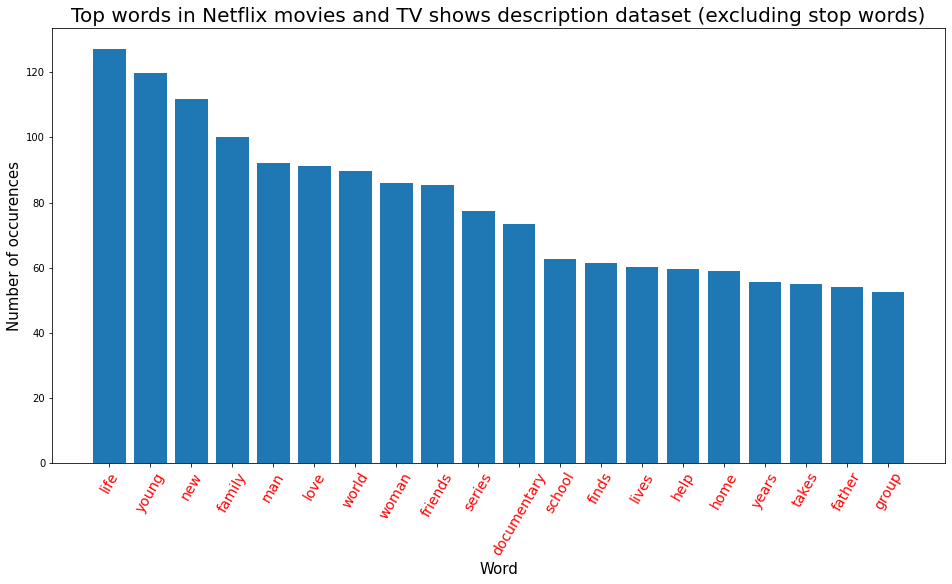

In [129]:
words, word_values = get_top_n_words(n_top_words=20,
                                     vectorizer=vectorizer, 
                                     text_data=title_description['tokenized_description'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation=60,fontsize=14,color='red')
ax.set_title('Top words in Netflix movies and TV shows description dataset (excluding stop words)',fontsize=20)
ax.set_xlabel('Word',fontsize=15)
ax.set_ylabel('Number of occurences',fontsize=15)
plt.show()

#### Checking the effect of WordNetLemmatizer()

In [ ]:
# import these modules
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()
 
print("rocks :", lemmatizer.lemmatize("rocks"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
rocks : rock


In [130]:
lemmatized_data = title_description['tokenized_description'].copy().apply(lambda x: lemmatizer.lemmatize(x))

In [157]:
print (f"tokenized : {title_description['tokenized_description'][25]} \n wordnet : {lemmatized_data[25] } ")

tokenized : reallife look FBI counterterrorism operations features access sides sting government informant radicalized target 
 wordnet : reallife look FBI counterterrorism operations features access sides sting government informant radicalized target 


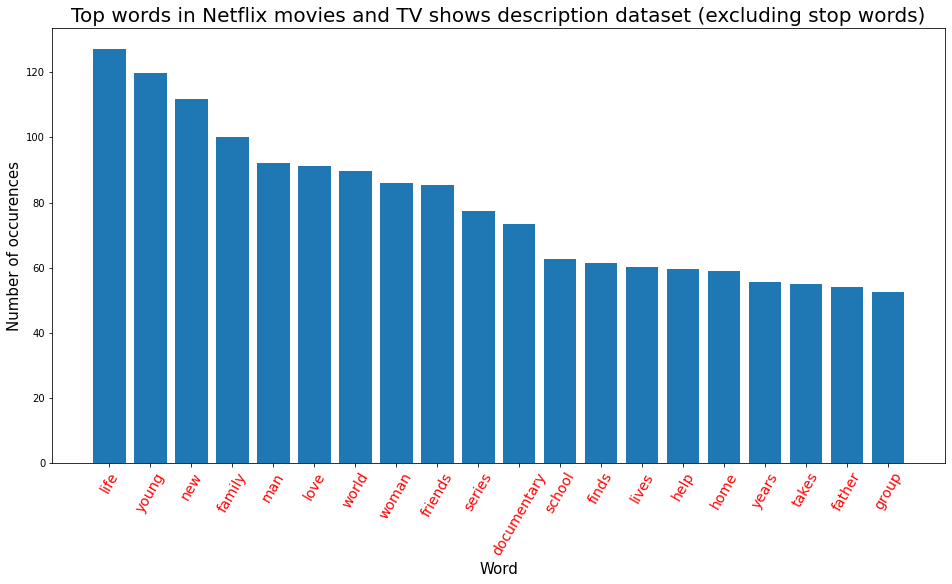

In [131]:
words, word_values = get_top_n_words(n_top_words=20,
                                     vectorizer=vectorizer, 
                                     text_data=lemmatized_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation=60,fontsize=14,color='red')
ax.set_title('Top words in Netflix movies and TV shows description dataset (excluding stop words)',fontsize=20)
ax.set_xlabel('Word',fontsize=15)
ax.set_ylabel('Number of occurences',fontsize=15)
plt.show()

#### Checking the effect of spacy lemmatizer

In [143]:
# Perform standard imports:
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])

In [150]:
spacy_lemmatized_data = title_description['tokenized_description'].copy().apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))# apply text to get the token in strong format

In [158]:
print (f"tokenized : {title_description['tokenized_description'][25]} \n wordnet : {lemmatized_data[25] } \n spacy : {spacy_lemmatized_data[25]}")

tokenized : reallife look FBI counterterrorism operations features access sides sting government informant radicalized target 
 wordnet : reallife look FBI counterterrorism operations features access sides sting government informant radicalized target 
 spacy : reallife look FBI counterterrorism operation feature access side ste government informant radicalize target


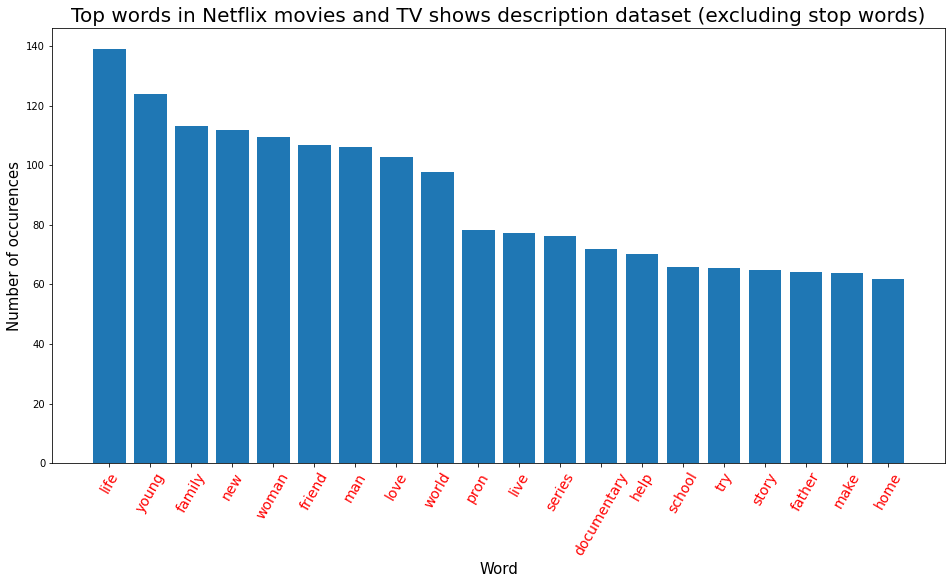

In [152]:
words, word_values = get_top_n_words(n_top_words=20,
                                     vectorizer=vectorizer, 
                                     text_data=spacy_lemmatized_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation=60,fontsize=14,color='red')
ax.set_title('Top words in Netflix movies and TV shows description dataset (excluding stop words)',fontsize=20)
ax.set_xlabel('Word',fontsize=15)
ax.set_ylabel('Number of occurences',fontsize=15)
plt.show()

####<u>Inference</u>: We see far better results with spacy library. So, we will use Spacy library for lemmatization. 

# <b><u>Feature Engineering (Vectorization)

In [160]:
# Use nltk library to remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Use string, we will use it to remove string punctuations
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [161]:
# Function to remove punctuations and stop words from the message
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [162]:
# Get tokenized description (by removing stop words and punctuations)
description_tokenized= title_description['description'].apply(text_process)

In [163]:
# Import spacy, proven better than wordnet for lemmatization
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])

In [164]:
# Get lemmatized description
description_lemmatized = description_tokenized.copy().apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))# apply text to get the token in strong format

In [165]:
# Get the length of the description, we will use this to set max_features in our vectorizer
len(description_lemmatized)

7787

In [166]:
# Import the tfidfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Intialize the vectorizer
vectorizer = TfidfVectorizer(min_df = 5,
                              max_df = 0.95,
                              max_features = len(description_lemmatized), lowercase=True,
                              stop_words = 'english')

In [174]:
# Apply the vectorizer
sparse_matrix = vectorizer.fit_transform(description_lemmatized) # X is in sparse matrix format, to visulaize it we need to convert it into array

In [178]:
# Get the sparse matrix array shape
sparse_matrix.toarray().shape

(7787, 3565)

In [179]:
# Visualize the sparse matrix
sparse_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [175]:
# Check out 4560 row
sparse_matrix.toarray()[4560]

array([0., 0., 0., ..., 0., 0., 0.])

In [176]:
# Get feature names
print(vectorizer.get_feature_names())

['10', '100', '10000', '100000', '10yearold', '11', '11yearold', '12', '12yearold', '13', '13yearold', '14yearold', '15', '15yearold', '16', '17yearold', '18', '18thcentury', '1920s', '1930s', '1950s', '1960', '1960s', '1970', '1970s', '1980', '1980s', '1989', '1990', '1990s', '1992', '1994', '1996', '19thcentury', '20', '2011', '2012', '2014', '2015', '2018', '20th', '21st', '24', '25', '30', '40', '50', '50th', '60', '70', '80', '90', '90s', 'aaron', 'abandon', 'abduct', 'abducted', 'abduction', 'ability', 'able', 'aboard', 'abroad', 'abruptly', 'absurd', 'abuse', 'abusive', 'academic', 'academy', 'accent', 'accept', 'access', 'accident', 'accidental', 'accidentally', 'acclaim', 'accompany', 'account', 'accuse', 'achieve', 'achievement', 'acquire', 'act', 'action', 'actionpacke', 'activist', 'activity', 'actor', 'actress', 'actually', 'ad', 'adam', 'adapt', 'adaptation', 'add', 'addict', 'addiction', 'adjust', 'admit', 'adolescence', 'adolescent', 'adolf', 'adopt', 'adorable', 'adore

In [180]:
# Store feature names in variable
feature_names = vectorizer.get_feature_names()

In [181]:
# Store the sparse_matrix data in the dataframe
sparse_df = pd.DataFrame(sparse_matrix.toarray() , columns=feature_names)
sparse_df.head()

,10,100,10000,100000,10yearold,11,11yearold,12,12yearold,13,...,young,youngster,youth,youtube,yuppie,zack,zany,zoe,zombie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Now, we have our vectorized dataframe and we can move forward to unveil the clusters! 

# <b><u>Clustering</b></u>

## K-Means Clustering 

### Optimal number of clusters

#### Silhouette score method

In [182]:
# Import the important libraries
import matplotlib.cm as cm
from sklearn.model_selection import ParameterGrid
import sklearn.metrics
from sklearn.cluster import KMeans  # for k-means clustering algorithm
from sklearn.metrics import silhouette_samples, silhouette_score # for scoring on basis of silhouette_score

In [183]:
# candidate values for our number of cluster
parameters = range(2,15)
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1  # set the floor limit for best_score
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = [] # silhouette scores will be added to the list

# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(sparse_df)          # fit model on sparse_df, this will find clusters based on parameter p
    ss = silhouette_score(sparse_df, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p

Parameter: {'n_clusters': 2} Score 0.0018620581354790522
Parameter: {'n_clusters': 3} Score 0.0024283582278051647
Parameter: {'n_clusters': 4} Score 0.0024626525303165685
Parameter: {'n_clusters': 5} Score 0.003269074880713042
Parameter: {'n_clusters': 6} Score 0.0038687018577043047
Parameter: {'n_clusters': 7} Score 0.004344720667149386
Parameter: {'n_clusters': 8} Score 0.00482276200163242
Parameter: {'n_clusters': 9} Score 0.005178328579846767
Parameter: {'n_clusters': 10} Score 0.005896352352484447
Parameter: {'n_clusters': 11} Score 0.0060492683273370524
Parameter: {'n_clusters': 12} Score 0.006274084650635803
Parameter: {'n_clusters': 13} Score 0.006594921350605347
Parameter: {'n_clusters': 14} Score 0.006819149500703743


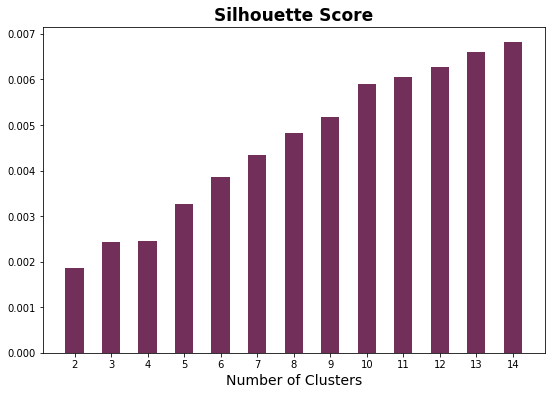

In [184]:
# plotting silhouette score
plt.figure(figsize=(9,6))
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold',fontsize=17)
plt.xlabel('Number of Clusters',fontsize=14)
plt.show()

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

#### Elbow method

In [185]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

# Define the elbow_method, choosing starting point for k as 10 since silhouette score gave us the idea that the optimal/usable k is certainly 10<=
def elbow_method(X, max_range_for_elbow, rseed = 0):
    return kelbow_visualizer(KMeans(random_state=rseed), X, k=(10, max_range_for_elbow),metric='distortion', timings=False, locate_elbow=True) 

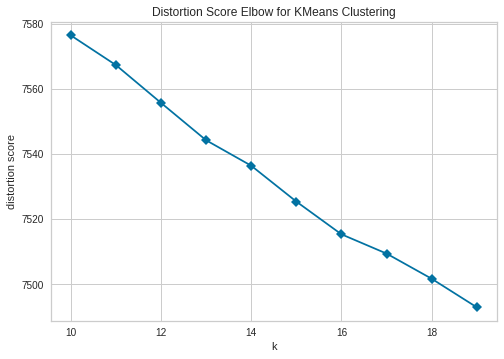

In [186]:
# Get the elbow plot
elbow = elbow_method(sparse_df,20)

#####We don't have any decisive k value so we will go with k=20, owing to generally considered 20 genres of movies

### Performance check [Model: K-means clustering (k=20)]

####davies_bouldin_score
The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

In [211]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

kmeans = KMeans(n_clusters=20, random_state=0).fit(sparse_df)
labels = kmeans.labels_

# Davies bouldin score, closer to 0 means better partition
davies_bouldin_score(sparse_df, labels)

9.211542819061538

####Silhouette score close to 1 means better prediction

In [212]:
# silhouette score, closer to 1 means better partition
silhouette_score(sparse_df, labels, metric='euclidean')

0.007426086070294106

####Calinski-Harabasz score
A higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared):

In [213]:
metrics.calinski_harabasz_score(sparse_df, labels)

12.651898577445012

### Training the k-means clustering model with 20 clusters

In [214]:
# Train the model
k_clusters = KMeans(n_clusters=20, random_state=7).fit_predict(sparse_df)

###Have a look at the results!

####<u><b>Plot the clusters</u></b>

In [215]:
# To plot the clusters 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [236]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)

    pca = PCA(n_components=2).fit_transform(data)
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    #label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in labels[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(18, 8))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    ax[0].grid(False)
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    ax[1].grid(False)

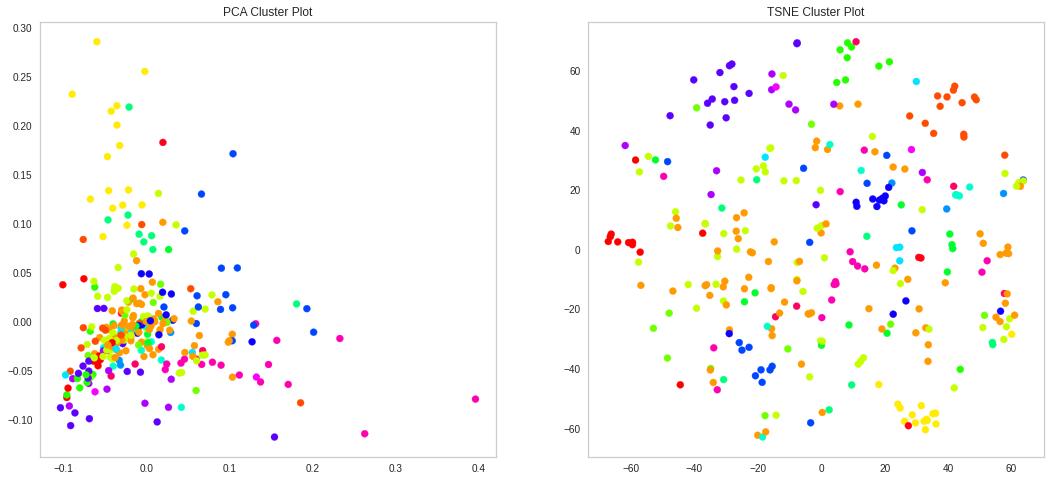

In [237]:
plot_tsne_pca(sparse_df, k_clusters)

#### <u><b>Top Keywords</u></b>
Lastly, we'll cycle through the clusters and print out the top keywords based on their TFIDF score to see if we can spot any trends. I'll do this by computing an average value across all dimensions in Pandas, grouped by the cluster label. Using numpy, finding the top words is simply sorting the average values for each row, and taking the top N.

You can see that we have a pretty good result. We got some really good results here like, check out cluster 2 having sports things, cluster 3 with muslim countries news, cluster 5 about devices things, cluster 6 about religion, cluster 13 about vehicles, etc. Other interesting approaches to this might include LDA topic modeling or possibly working with pre-trained word embeddings.

In [218]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(sparse_df, k_clusters, vectorizer.get_feature_names(), 20)


Cluster 0
tackle,joke,celebrity,audience,culture,star,share,sex,humor,live,topic,riff,deliver,funny,stage,comic,comedy,comedian,special,standup

Cluster 1
friend,mysterious,big,help,family,woman,life,live,young,cup,make,save,explore,way,learn,travel,new,ii,war,world

Cluster 2
secret,teen,girl,save,mother,woman,brother,father,boy,home,son,turn,meet,team,force,learn,help,try,young,pron

Cluster 3
navigate,team,romance,try,good,college,senior,pron,monster,attend,classmate,life,friend,new,girl,teacher,teen,student,high,school

Cluster 4
star,look,drama,power,woman,battle,host,history,challenge,career,student,personal,explore,struggle,lead,city,face,live,new,life

Cluster 5
brother,dragon,father,save,village,life,teen,man,tale,family,young,discover,girl,woman,friend,pron,prove,sight,adventure,set

Cluster 6
culture,film,story,history,year,impact,capture,legendary,profile,footage,feature,career,interview,examine,world,chronicle,life,follow,explore,documentary

Cluster 7
struggle,girlfriend

#### <b><u>Get similar content </b></u>

In [219]:
# Get the content dataframe
content = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone project/Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [220]:
# Add cluster column
content['cluster'] = k_clusters

In [224]:
# Get number of movies in each cluster
for i in range(content['cluster'].nunique()):
  print('cluster{} has {} content'.format(i,content[content['cluster']==i]['title'].count()))

cluster0 has 256 content
cluster1 has 341 content
cluster2 has 1748 content
cluster3 has 267 content
cluster4 has 1388 content
cluster5 has 184 content
cluster6 has 281 content
cluster7 has 281 content
cluster8 has 373 content
cluster9 has 250 content
cluster10 has 171 content
cluster11 has 142 content
cluster12 has 387 content
cluster13 has 346 content
cluster14 has 296 content
cluster15 has 258 content
cluster16 has 122 content
cluster17 has 426 content
cluster18 has 134 content
cluster19 has 136 content


In [228]:
cluster_series=pd.Series([content[content['cluster']==i]['title'].tolist() for i in range(content['cluster'].nunique())])
cluster_series

0     [A Russell Peters Christmas, Adam Devine: Best...
1     [9, Òlòtūré, 2015 Dream Concert, 21 Again, 7 D...
2     [3%, 23:59, 122, 3022, ​​Kuch Bheege Alfaaz, ​...
3     [187, #FriendButMarried, 1 Chance 2 Dance, 1 M...
4     [7:19, 21, 46, 1994, ​Goli Soda 2, ​Mayurakshi...
5     [10,000 B.C., 28 Moons, A Fall from Grace, A G...
6     [2,215, #AnneFrank - Parallel Stories, #cats_t...
7     [Şubat, 2036 Origin Unknown, 3 Generations, A ...
8     [Feb-09, #FriendButMarried 2, #Selfie 69, 44 C...
9     [706, 1920, 1922, 20 Minutes, 42 Grams, 4th Re...
10    [21 Sarfarosh: Saragarhi 1897, 25 Kille, 93 Da...
11    [1983, Oct-01, 27, el club de los malditos, A ...
12    [15-Aug, #Roxy, 100 Days My Prince, 21 Thunder...
13    [12 Years Promise, 14 Cameras, 2 States, 3 Tür...
14    [#blackAF, 13 Reasons Why, 72 Cutest Animals, ...
15    [22-Jul, '89, 13TH: A Conversation with Oprah ...
16    [3 Days to Kill, Abdo Mota, Ali & Alia, Americ...
17    [#Alive, 10 Days in Sun City, 100 Meters, 

#### <b><u>Check out the cluster for similar content.</b></u>

In [232]:
cluster_series[0]  # I'm expecting comedy content from Russell Peters name since he is a worldclass stand up comedian # A cluster of mostly comedy content

['A Russell Peters Christmas',
 'Adam Devine: Best Time of Our Lives',
 'Adam Ruins Everything',
 'ADAM SANDLER 100% FRESH',
 'Adel Karam: Live from Beirut',
 "Aditi Mittal: Things They Wouldn't Let Me Say",
 'Agustín Aristarán: Soy Rada',
 'Alan Saldaña: Mi vida de pobre',
 'All About Nina',
 "All the Devil's Men",
 'Amy Schumer Growing',
 'Amy Schumer: The Leather Special',
 'Anjelah Johnson: Not Fancy',
 'Anthony Jeselnik: Fire in the Maternity Ward',
 'Anthony Jeselnik: Thoughts and Prayers',
 'Arango y Sanint: Ríase el show',
 'Ari Eldjárn: Pardon My Icelandic',
 'Ari Shaffir: Double Negative',
 'Arsenio Hall: Smart & Classy',
 'Aziz Ansari Live at Madison Square Garden',
 'Aziz Ansari: RIGHT NOW',
 'Bert Kreischer: Hey Big Boy',
 'Bert Kreischer: Secret Time',
 'Bert Kreischer: The Machine',
 'Best of Stand-Up 2020',
 'Bill Burr: Let It Go',
 'Bill Burr: Paper Tiger',
 'Bill Hicks: Relentless',
 'Bill Hicks: Revelations',
 'Billy on the Street',
 'BNA',
 'Bo Burnham: Make Happy',

In [230]:
cluster_series[10]  # I'm expecting adventure content # A cluster of mixed adventure, mystery, horror content

['21 Sarfarosh: Saragarhi 1897',
 '25 Kille',
 '93 Days',
 'A Twelve Year Night',
 'Adrift',
 'AJIN: Demi-Human',
 'Akame ga Kill!',
 'Akbar\xa0Birbal',
 'All Good Ones Get Away',
 'American Masters: Ted Williams',
 "Angel 'N' Devil",
 'Ankur Arora Murder Case',
 'Attack on Titan',
 'Austin Powers in Goldmember',
 'Bakugan: Battle Planet',
 'Band Aid',
 'Beauty and the Bitches',
 'Bending the Arc',
 'Black Man White Skin',
 'Bombshell',
 'Born Strong',
 'Breaking the Bank',
 'Bullet Head',
 'BuyBust',
 'Castlevania',
 'Chaar\xa0Sahibzaade',
 'Close',
 'Crossroads: One Two Jaga',
 'Cyborg 009: Call of Justice',
 'Dagh Ujala',
 'Dare to Be Wild',
 'Dawai Asmara',
 'DC Super Hero Girls',
 'Elles étaient en guerre 1939-1945',
 'EVANGELION: DEATH (TRUE)²',
 'Fate/EXTRA Last Encore',
 'Father of the Year',
 'FIGHTWORLD',
 'FirstBorn',
 'Five Elements Ninjas',
 'Frontier',
 'Girls Incarcerated',
 'Glee',
 'Gook',
 'Gour Hari Dastaan: The Freedom File',
 'Gridlocked',
 'Guzaarish',
 'Halo: The

In [231]:
cluster_series[14]  # I'm expecting documentry, drama content from #blackaf and 13 reasons why # A cluster of mostly dramas, documentaries and pyschological thrillers. bang on!

['#blackAF',
 '13 Reasons Why',
 '72 Cutest Animals',
 '72 Dangerous Animals: Latin America',
 'Aşk Tesadüfleri Sever',
 'Absurd Planet',
 'Africa',
 'After Porn Ends 3',
 'Ajaibnya Cinta',
 'Alice in Borderland',
 'Alien Worlds',
 'AllI Wish',
 "America's Book of Secrets",
 "America's Next Top Model",
 'American Crime',
 'American Crime Story: The People v. O.J. Simpson',
 'Andhadhun',
 'Anesthesia',
 'Anthony Bourdain: Parts Unknown',
 'Apaches',
 'Assimilate',
 'Babel',
 'Bal Ganesh',
 'Barbie Life in the Dreamhouse',
 'Be Here Now',
 'Becoming Champions',
 'Berlin, Berlin: Lolle on the Run',
 "Best Wishes, Warmest Regards: A Schitt's Creek Farewell",
 'Beyblade: Metal Fusion',
 'Big Bad Beetleborgs',
 'Black Mirror',
 'Bling Empire',
 'Bloodride',
 'Blue Planet II',
 'Bondi Rescue',
 'Border Patrol',
 "Border Security: America's Front Line",
 'Borderline',
 'Brain Games',
 'Bringing Sexy Back',
 'Buddha',
 "Bunk'd",
 'Cain and Abel',
 'Camarón Revolution',
 'Captive',
 "Charlie's A

Let's check one more randomly, my unlucky number 3

In [233]:
cluster_series[3]  # It contains young-adult, love, friendship content. 

['187',
 '#FriendButMarried',
 '1 Chance 2 Dance',
 '1 Mile to You',
 '100 Things to do Before High School',
 '21 & Over',
 '3 Idiots',
 "A Babysitter's Guide to Monster Hunting",
 'A Scandall',
 'A Silent Voice',
 'A Walk to Remember',
 'Accidentally in Love',
 'Across The Line',
 'Adventures in Public School',
 'Afterschool',
 'Age of Rebellion',
 'Alex Strangelove',
 'Alexa & Katie',
 'Alice Junior',
 'All American',
 'Amateur',
 "American Pie 9: Girls' Rules",
 'American Vandal',
 'Angel Beats!',
 '忍者ハットリくん',
 'Attitude Test',
 'Away From Home',
 'Back to the 90s',
 'Bad Education',
 'Bad Genius',
 'Barbie: Princess Charm School',
 'Barely Lethal',
 'Barrio Universitario',
 'Be Somebody',
 'Bella and the Bulldogs',
 'Big Bear',
 'Billy Elliot',
 'Blue Jasmine',
 'Blue Jay',
 'Blue Mountain State: The Rise of Thadland',
 'BONDING',
 'Boys Over Flowers',
 'Bratz: The Movie',
 'Breaking Bad',
 'Brick',
 'Bruno and Boots: Go Jump in the Pool',
 'Bruno and Boots: The Wizzle War',
 'Burn

####Although the model performed badly on the performance metrics, the quality of clusters it gave are amazing!

In [222]:
list(content[content['cluster']==0]['title'])

['A Russell Peters Christmas',
 'Adam Devine: Best Time of Our Lives',
 'Adam Ruins Everything',
 'ADAM SANDLER 100% FRESH',
 'Adel Karam: Live from Beirut',
 "Aditi Mittal: Things They Wouldn't Let Me Say",
 'Agustín Aristarán: Soy Rada',
 'Alan Saldaña: Mi vida de pobre',
 'All About Nina',
 "All the Devil's Men",
 'Amy Schumer Growing',
 'Amy Schumer: The Leather Special',
 'Anjelah Johnson: Not Fancy',
 'Anthony Jeselnik: Fire in the Maternity Ward',
 'Anthony Jeselnik: Thoughts and Prayers',
 'Arango y Sanint: Ríase el show',
 'Ari Eldjárn: Pardon My Icelandic',
 'Ari Shaffir: Double Negative',
 'Arsenio Hall: Smart & Classy',
 'Aziz Ansari Live at Madison Square Garden',
 'Aziz Ansari: RIGHT NOW',
 'Bert Kreischer: Hey Big Boy',
 'Bert Kreischer: Secret Time',
 'Bert Kreischer: The Machine',
 'Best of Stand-Up 2020',
 'Bill Burr: Let It Go',
 'Bill Burr: Paper Tiger',
 'Bill Hicks: Relentless',
 'Bill Hicks: Revelations',
 'Billy on the Street',
 'BNA',
 'Bo Burnham: Make Happy',

## DBSCAN clustering

It can identify clusters in large spatial datasets by looking at the local density of the data points. The most exciting feature of DBSCAN clustering is that it is robust to outliers. It also does not require the number of clusters to be told beforehand, unlike K-Means, where we have to specify the number of centroids.

### Optimal number of clusters

#### Silhouette score method

In [ ]:
# Import the important libraries
import matplotlib.cm as cm
from sklearn.model_selection import ParameterGrid
import sklearn.metrics
from sklearn.cluster import KMeans  # for k-means clustering algorithm
from sklearn.metrics import silhouette_samples, silhouette_score # for scoring on basis of silhouette_score

In [ ]:
# candidate values for our number of cluster
parameters = range(2,15)
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1  # set the floor limit for best_score
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = [] # silhouette scores will be added to the list

# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(sparse_df)          # fit model on sparse_df, this will find clusters based on parameter p
    ss = silhouette_score(sparse_df, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p

Parameter: {'n_clusters': 2} Score 0.0018620581354790522
Parameter: {'n_clusters': 3} Score 0.0024283582278051647
Parameter: {'n_clusters': 4} Score 0.0024626525303165685
Parameter: {'n_clusters': 5} Score 0.003269074880713042
Parameter: {'n_clusters': 6} Score 0.0038687018577043047
Parameter: {'n_clusters': 7} Score 0.004344720667149386
Parameter: {'n_clusters': 8} Score 0.00482276200163242
Parameter: {'n_clusters': 9} Score 0.005178328579846767
Parameter: {'n_clusters': 10} Score 0.005896352352484447
Parameter: {'n_clusters': 11} Score 0.0060492683273370524
Parameter: {'n_clusters': 12} Score 0.006274084650635803
Parameter: {'n_clusters': 13} Score 0.006594921350605347
Parameter: {'n_clusters': 14} Score 0.006819149500703743


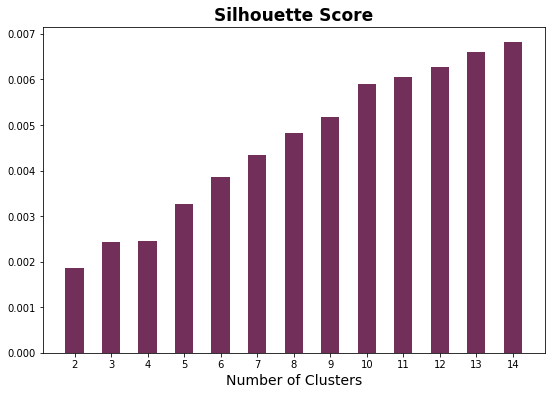

In [ ]:
# plotting silhouette score
plt.figure(figsize=(9,6))
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold',fontsize=17)
plt.xlabel('Number of Clusters',fontsize=14)
plt.show()

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

#### Elbow method

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

# Define the elbow_method, choosing starting point for k as 10 since silhouette score gave us the idea that the optimal/usable k is certainly 10<=
def elbow_method(X, max_range_for_elbow, rseed = 0):
    return kelbow_visualizer(KMeans(random_state=rseed), X, k=(10, max_range_for_elbow),metric='distortion', timings=False, locate_elbow=True) 

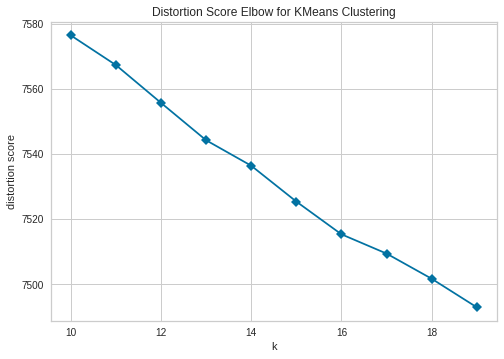

In [ ]:
# Get the elbow plot
elbow = elbow_method(sparse_df,20)

#####We don't have any decisive k value so we will go with k=20, owing to generally considered 20 genres of movies

### Performance check [Model: K-means clustering (k=20)]

####davies_bouldin_score
The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

kmeans = KMeans(n_clusters=20, random_state=0).fit(sparse_df)
labels = kmeans.labels_

# Davies bouldin score, closer to 0 means better partition
davies_bouldin_score(sparse_df, labels)

9.211542819061538

####Silhouette score close to 1 means better prediction

In [ ]:
# silhouette score, closer to 1 means better partition
silhouette_score(sparse_df, labels, metric='euclidean')

0.007426086070294106

####Calinski-Harabasz score
A higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared):

In [ ]:
metrics.calinski_harabasz_score(sparse_df, labels)

12.651898577445012

### Training the k-means clustering model with 20 clusters

In [ ]:
# Train the model
k_clusters = KMeans(n_clusters=20, random_state=7).fit_predict(sparse_df)

###Have a look at the results!

####<u><b>Plot the clusters</u></b>

In [ ]:
# To plot the clusters 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)

    pca = PCA(n_components=2).fit_transform(data)
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    #label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in labels[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(18, 8))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    ax[0].grid(False)
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    ax[1].grid(False)

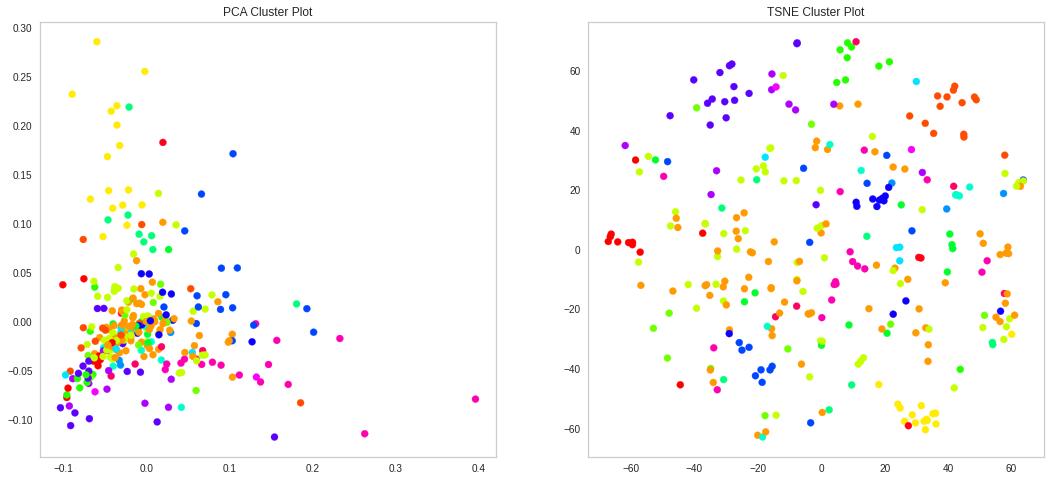

In [ ]:
plot_tsne_pca(sparse_df, k_clusters)

#### <u><b>Top Keywords</u></b>
Lastly, we'll cycle through the clusters and print out the top keywords based on their TFIDF score to see if we can spot any trends. I'll do this by computing an average value across all dimensions in Pandas, grouped by the cluster label. Using numpy, finding the top words is simply sorting the average values for each row, and taking the top N.

You can see that we have a pretty good result. We got some really good results here like, check out cluster 2 having sports things, cluster 3 with muslim countries news, cluster 5 about devices things, cluster 6 about religion, cluster 13 about vehicles, etc. Other interesting approaches to this might include LDA topic modeling or possibly working with pre-trained word embeddings.

In [ ]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(sparse_df, k_clusters, vectorizer.get_feature_names(), 20)


Cluster 0
tackle,joke,celebrity,audience,culture,star,share,sex,humor,live,topic,riff,deliver,funny,stage,comic,comedy,comedian,special,standup

Cluster 1
friend,mysterious,big,help,family,woman,life,live,young,cup,make,save,explore,way,learn,travel,new,ii,war,world

Cluster 2
secret,teen,girl,save,mother,woman,brother,father,boy,home,son,turn,meet,team,force,learn,help,try,young,pron

Cluster 3
navigate,team,romance,try,good,college,senior,pron,monster,attend,classmate,life,friend,new,girl,teacher,teen,student,high,school

Cluster 4
star,look,drama,power,woman,battle,host,history,challenge,career,student,personal,explore,struggle,lead,city,face,live,new,life

Cluster 5
brother,dragon,father,save,village,life,teen,man,tale,family,young,discover,girl,woman,friend,pron,prove,sight,adventure,set

Cluster 6
culture,film,story,history,year,impact,capture,legendary,profile,footage,feature,career,interview,examine,world,chronicle,life,follow,explore,documentary

Cluster 7
struggle,girlfriend

#### <b><u>Get similar content </b></u>

In [ ]:
# Get the content dataframe
content = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone project/Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
# Add cluster column
content['cluster'] = k_clusters

In [ ]:
# Get number of movies in each cluster
for i in range(content['cluster'].nunique()):
  print('cluster{} has {} content'.format(i,content[content['cluster']==i]['title'].count()))

cluster0 has 256 content
cluster1 has 341 content
cluster2 has 1748 content
cluster3 has 267 content
cluster4 has 1388 content
cluster5 has 184 content
cluster6 has 281 content
cluster7 has 281 content
cluster8 has 373 content
cluster9 has 250 content
cluster10 has 171 content
cluster11 has 142 content
cluster12 has 387 content
cluster13 has 346 content
cluster14 has 296 content
cluster15 has 258 content
cluster16 has 122 content
cluster17 has 426 content
cluster18 has 134 content
cluster19 has 136 content


In [ ]:
cluster_series=pd.Series([content[content['cluster']==i]['title'].tolist() for i in range(content['cluster'].nunique())])
cluster_series

0     [A Russell Peters Christmas, Adam Devine: Best...
1     [9, Òlòtūré, 2015 Dream Concert, 21 Again, 7 D...
2     [3%, 23:59, 122, 3022, ​​Kuch Bheege Alfaaz, ​...
3     [187, #FriendButMarried, 1 Chance 2 Dance, 1 M...
4     [7:19, 21, 46, 1994, ​Goli Soda 2, ​Mayurakshi...
5     [10,000 B.C., 28 Moons, A Fall from Grace, A G...
6     [2,215, #AnneFrank - Parallel Stories, #cats_t...
7     [Şubat, 2036 Origin Unknown, 3 Generations, A ...
8     [Feb-09, #FriendButMarried 2, #Selfie 69, 44 C...
9     [706, 1920, 1922, 20 Minutes, 42 Grams, 4th Re...
10    [21 Sarfarosh: Saragarhi 1897, 25 Kille, 93 Da...
11    [1983, Oct-01, 27, el club de los malditos, A ...
12    [15-Aug, #Roxy, 100 Days My Prince, 21 Thunder...
13    [12 Years Promise, 14 Cameras, 2 States, 3 Tür...
14    [#blackAF, 13 Reasons Why, 72 Cutest Animals, ...
15    [22-Jul, '89, 13TH: A Conversation with Oprah ...
16    [3 Days to Kill, Abdo Mota, Ali & Alia, Americ...
17    [#Alive, 10 Days in Sun City, 100 Meters, 

#### <b><u>Check out the cluster for similar content.</b></u>

In [ ]:
cluster_series[0]  # I'm expecting comedy content from Russell Peters name since he is a worldclass stand up comedian # A cluster of mostly comedy content

['A Russell Peters Christmas',
 'Adam Devine: Best Time of Our Lives',
 'Adam Ruins Everything',
 'ADAM SANDLER 100% FRESH',
 'Adel Karam: Live from Beirut',
 "Aditi Mittal: Things They Wouldn't Let Me Say",
 'Agustín Aristarán: Soy Rada',
 'Alan Saldaña: Mi vida de pobre',
 'All About Nina',
 "All the Devil's Men",
 'Amy Schumer Growing',
 'Amy Schumer: The Leather Special',
 'Anjelah Johnson: Not Fancy',
 'Anthony Jeselnik: Fire in the Maternity Ward',
 'Anthony Jeselnik: Thoughts and Prayers',
 'Arango y Sanint: Ríase el show',
 'Ari Eldjárn: Pardon My Icelandic',
 'Ari Shaffir: Double Negative',
 'Arsenio Hall: Smart & Classy',
 'Aziz Ansari Live at Madison Square Garden',
 'Aziz Ansari: RIGHT NOW',
 'Bert Kreischer: Hey Big Boy',
 'Bert Kreischer: Secret Time',
 'Bert Kreischer: The Machine',
 'Best of Stand-Up 2020',
 'Bill Burr: Let It Go',
 'Bill Burr: Paper Tiger',
 'Bill Hicks: Relentless',
 'Bill Hicks: Revelations',
 'Billy on the Street',
 'BNA',
 'Bo Burnham: Make Happy',

In [ ]:
cluster_series[10]  # I'm expecting adventure content # A cluster of mixed adventure, mystery, horror content

['21 Sarfarosh: Saragarhi 1897',
 '25 Kille',
 '93 Days',
 'A Twelve Year Night',
 'Adrift',
 'AJIN: Demi-Human',
 'Akame ga Kill!',
 'Akbar\xa0Birbal',
 'All Good Ones Get Away',
 'American Masters: Ted Williams',
 "Angel 'N' Devil",
 'Ankur Arora Murder Case',
 'Attack on Titan',
 'Austin Powers in Goldmember',
 'Bakugan: Battle Planet',
 'Band Aid',
 'Beauty and the Bitches',
 'Bending the Arc',
 'Black Man White Skin',
 'Bombshell',
 'Born Strong',
 'Breaking the Bank',
 'Bullet Head',
 'BuyBust',
 'Castlevania',
 'Chaar\xa0Sahibzaade',
 'Close',
 'Crossroads: One Two Jaga',
 'Cyborg 009: Call of Justice',
 'Dagh Ujala',
 'Dare to Be Wild',
 'Dawai Asmara',
 'DC Super Hero Girls',
 'Elles étaient en guerre 1939-1945',
 'EVANGELION: DEATH (TRUE)²',
 'Fate/EXTRA Last Encore',
 'Father of the Year',
 'FIGHTWORLD',
 'FirstBorn',
 'Five Elements Ninjas',
 'Frontier',
 'Girls Incarcerated',
 'Glee',
 'Gook',
 'Gour Hari Dastaan: The Freedom File',
 'Gridlocked',
 'Guzaarish',
 'Halo: The

In [ ]:
cluster_series[14]  # I'm expecting documentry, drama content from #blackaf and 13 reasons why # A cluster of mostly dramas, documentaries and pyschological thrillers. bang on!

['#blackAF',
 '13 Reasons Why',
 '72 Cutest Animals',
 '72 Dangerous Animals: Latin America',
 'Aşk Tesadüfleri Sever',
 'Absurd Planet',
 'Africa',
 'After Porn Ends 3',
 'Ajaibnya Cinta',
 'Alice in Borderland',
 'Alien Worlds',
 'AllI Wish',
 "America's Book of Secrets",
 "America's Next Top Model",
 'American Crime',
 'American Crime Story: The People v. O.J. Simpson',
 'Andhadhun',
 'Anesthesia',
 'Anthony Bourdain: Parts Unknown',
 'Apaches',
 'Assimilate',
 'Babel',
 'Bal Ganesh',
 'Barbie Life in the Dreamhouse',
 'Be Here Now',
 'Becoming Champions',
 'Berlin, Berlin: Lolle on the Run',
 "Best Wishes, Warmest Regards: A Schitt's Creek Farewell",
 'Beyblade: Metal Fusion',
 'Big Bad Beetleborgs',
 'Black Mirror',
 'Bling Empire',
 'Bloodride',
 'Blue Planet II',
 'Bondi Rescue',
 'Border Patrol',
 "Border Security: America's Front Line",
 'Borderline',
 'Brain Games',
 'Bringing Sexy Back',
 'Buddha',
 "Bunk'd",
 'Cain and Abel',
 'Camarón Revolution',
 'Captive',
 "Charlie's A

Let's check one more randomly, my unlucky number 3

In [ ]:
cluster_series[3]  # It contains young-adult, love, friendship content. 

['187',
 '#FriendButMarried',
 '1 Chance 2 Dance',
 '1 Mile to You',
 '100 Things to do Before High School',
 '21 & Over',
 '3 Idiots',
 "A Babysitter's Guide to Monster Hunting",
 'A Scandall',
 'A Silent Voice',
 'A Walk to Remember',
 'Accidentally in Love',
 'Across The Line',
 'Adventures in Public School',
 'Afterschool',
 'Age of Rebellion',
 'Alex Strangelove',
 'Alexa & Katie',
 'Alice Junior',
 'All American',
 'Amateur',
 "American Pie 9: Girls' Rules",
 'American Vandal',
 'Angel Beats!',
 '忍者ハットリくん',
 'Attitude Test',
 'Away From Home',
 'Back to the 90s',
 'Bad Education',
 'Bad Genius',
 'Barbie: Princess Charm School',
 'Barely Lethal',
 'Barrio Universitario',
 'Be Somebody',
 'Bella and the Bulldogs',
 'Big Bear',
 'Billy Elliot',
 'Blue Jasmine',
 'Blue Jay',
 'Blue Mountain State: The Rise of Thadland',
 'BONDING',
 'Boys Over Flowers',
 'Bratz: The Movie',
 'Breaking Bad',
 'Brick',
 'Bruno and Boots: Go Jump in the Pool',
 'Bruno and Boots: The Wizzle War',
 'Burn

####Although the model performed badly on the performance metrics, the quality of clusters it gave are amazing!

In [ ]:
list(content[content['cluster']==0]['title'])

['A Russell Peters Christmas',
 'Adam Devine: Best Time of Our Lives',
 'Adam Ruins Everything',
 'ADAM SANDLER 100% FRESH',
 'Adel Karam: Live from Beirut',
 "Aditi Mittal: Things They Wouldn't Let Me Say",
 'Agustín Aristarán: Soy Rada',
 'Alan Saldaña: Mi vida de pobre',
 'All About Nina',
 "All the Devil's Men",
 'Amy Schumer Growing',
 'Amy Schumer: The Leather Special',
 'Anjelah Johnson: Not Fancy',
 'Anthony Jeselnik: Fire in the Maternity Ward',
 'Anthony Jeselnik: Thoughts and Prayers',
 'Arango y Sanint: Ríase el show',
 'Ari Eldjárn: Pardon My Icelandic',
 'Ari Shaffir: Double Negative',
 'Arsenio Hall: Smart & Classy',
 'Aziz Ansari Live at Madison Square Garden',
 'Aziz Ansari: RIGHT NOW',
 'Bert Kreischer: Hey Big Boy',
 'Bert Kreischer: Secret Time',
 'Bert Kreischer: The Machine',
 'Best of Stand-Up 2020',
 'Bill Burr: Let It Go',
 'Bill Burr: Paper Tiger',
 'Bill Hicks: Relentless',
 'Bill Hicks: Revelations',
 'Billy on the Street',
 'BNA',
 'Bo Burnham: Make Happy',